# Neural Nets for Classification - Multi Layer Perceptron

In [2]:
import numpy as np
import sklearn
import gzip
from matplotlib import pyplot as plt
# These are some parameters to make figures nice (and big)

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Data Pre Processing
### Read Data

In [3]:
# Training data

# images
f = gzip.open('train-images-idx3-ubyte.gz','r')
image_size = 28
n_images_train = 50000

f.read(16)
buf = f.read(image_size * image_size * n_images_train)
data_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_train = data_train.reshape(n_images_train, image_size, image_size)
data_train=data_train/255

# labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
labels_train=np.zeros(n_images_train)
for i in range(0,n_images_train):   
    buf = f.read(1)
    labels_train[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_train=labels_train.astype(int)    

In [4]:
# Test data

#images
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
image_size = 28
n_images_test = 10000
f.read(16)
buf = f.read(image_size * image_size * n_images_test)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(n_images_test, image_size, image_size)
data_test = data_test/255

#labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
labels_test=np.zeros(n_images_test)
for i in range(0,n_images_test):   
    buf = f.read(1)
    labels_test[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_test=labels_test.astype(int)    

### Inspect Raw Data 
#### Data shape

In [5]:
# let's look at the data shape

print('training data')
print(data_train.shape)
print(labels_train.shape)
print(' ')
print('test data')
print(data_test.shape)
print(labels_test.shape)
print(' ')

print(labels_train[0:5])

training data
(50000, 28, 28)
(50000,)
 
test data
(10000, 28, 28)
(10000,)
 
[5 0 4 1 9]


### Plot

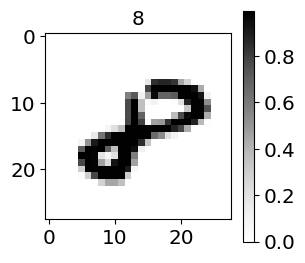

In [6]:
plt.figure(figsize=[3,3])

ind=np.random.randint(0,n_images_train)

plt.imshow(data_train[ind],cmap=plt.get_cmap('Greys'));
plt.title(labels_train[ind]); 
plt.colorbar();

## Restructure raw data into input data

In [7]:
X_train=data_train.squeeze().reshape(n_images_train,28*28)
y_train=labels_train
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


In [8]:
X_test=data_test.squeeze().reshape(n_images_test,28*28)
y_test=labels_test
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


# Neural Net
### Train Model

In [9]:
from sklearn import neural_network

#Define architecture (hyperparameters) 
mlp_obj=neural_network.MLPClassifier(hidden_layer_sizes=[256,128],max_iter=1000,alpha=0.001)

# fit model (learn parameters)
mlp=mlp_obj.fit(X_train,y_train)

# make predictions
yhat_test=mlp.predict(X_test)

### Make Predictions 

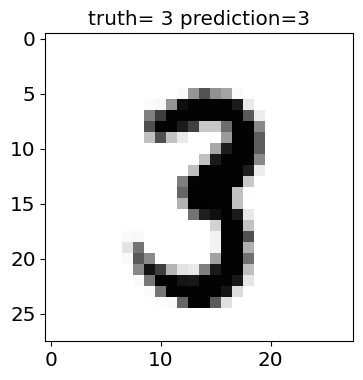

In [10]:
ind=np.random.randint(0,n_images_test)
plt.figure(figsize=[4,4])
plt.imshow(data_test[ind],cmap=plt.get_cmap('Greys'));
plt.title('truth= '+str(y_test[ind])+' prediction='+str(yhat_test[ind])); 

### Confusion Matrix

1.9299999999999984


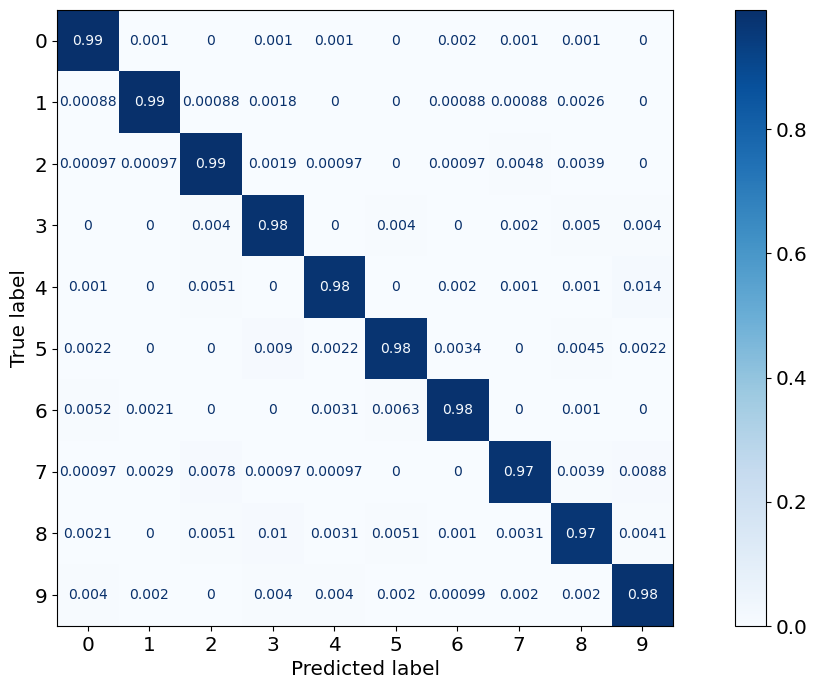

In [12]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true = y_test, y_pred = yhat_test)
ConfusionMatrixDisplay.from_predictions(y_test, yhat_test,cmap=plt.cm.Blues,normalize='true')

score=sklearn.metrics.accuracy_score(yhat_test,y_test)
print((1-score)*100)